# Machine Learning Implementation

This document contains the actual data splitting, training, and metrics for the following machine learning models (random forests, support vector  machines) 

## Importing our libraries

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_auc_score, roc_curve
from sklearn.svm import SVC
import pickle

## Reading saved clean data

In [8]:
base_df = pd.read_pickle('cleaned_data_loan_approval.pkl')
base_no_outliers_df = pd.read_pickle('cleaned_data_loan_approval_without_outliers.pkl')
display(base_df.head())
print(base_df.shape)
display(base_no_outliers_df.head())
print(base_no_outliers_df.shape)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0


(614, 15)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Loan_Status,Semiurban,Urban,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,1,0,0,0


(445, 15)


## Splitting Data

In [13]:
# Base Model
X = base_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y = base_df['Loan_Status']

# With outliers removed
X_1 = base_no_outliers_df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Gender', 'Married', 'Education', 'Self_Employed','Semiurban','Urban','1','2','3+' ]]
y_1 = base_no_outliers_df['Loan_Status']

print(f'Shape: X{X.shape}, y{y.shape}')
print(f'Shape: X_1{X_1.shape}, y_1{y_1.shape}')

Shape: X(614, 14), y(614,)
Shape: X_1(445, 14), y_1(445,)


## Training Random Forest Models

### Base Models

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        63
           1       0.77      0.91      0.83       122

    accuracy                           0.76       185
   macro avg       0.75      0.69      0.71       185
weighted avg       0.76      0.76      0.75       185



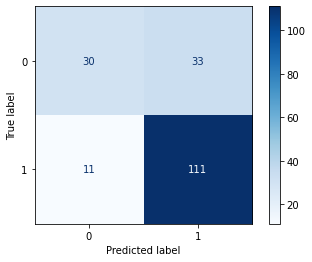

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train,y_train)

forest_pred = forest.predict(X_test)

print(classification_report(y_test, forest_pred))
print(plot_confusion_matrix(forest, X_test,y_test, cmap=plt.cm.Blues))

### Without Outliers

              precision    recall  f1-score   support

           0       0.71      0.34      0.46        35
           1       0.80      0.95      0.87        99

    accuracy                           0.79       134
   macro avg       0.75      0.65      0.67       134
weighted avg       0.78      0.79      0.76       134



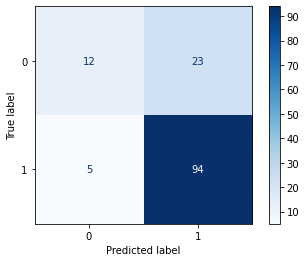

In [21]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size = 0.3, random_state = 100)

forest_1 = RandomForestClassifier(n_estimators = 100)
forest_1.fit(X_train_1,y_train_1)

forest_pred_1 = forest_1.predict(X_test_1)
print(classification_report(y_test_1, forest_pred_1))
print(plot_confusion_matrix(forest_1, X_test_1,y_test_1, cmap=plt.cm.Blues))

## Feature Importance

In [23]:
def feature_plot(coef, columns,y_title = 'coefficients'):
    feature_imp = pd.DataFrame(coef.T, columns = ['importance'])
    feature_imp['feature'] = columns
    feature_imp.sort_values(by=['importance'], ascending = False, inplace = True)
    feature_imp.plot(x = 'feature', kind = 'bar', figsize = (16,4))
    plt.title(y_title)
    plt.ylabel(y_title)

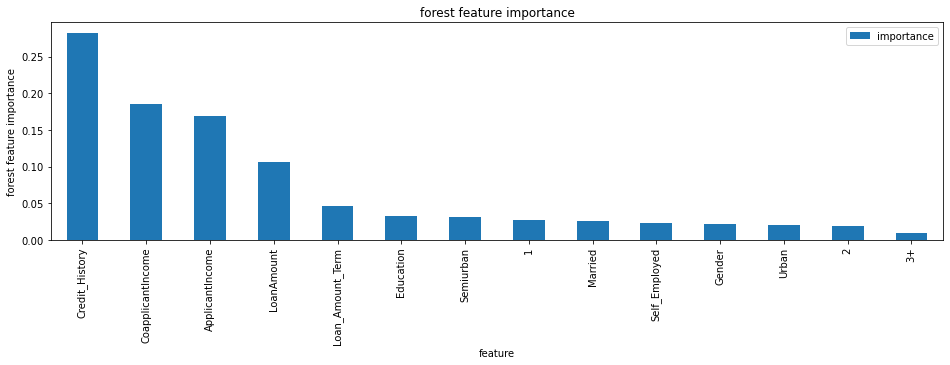

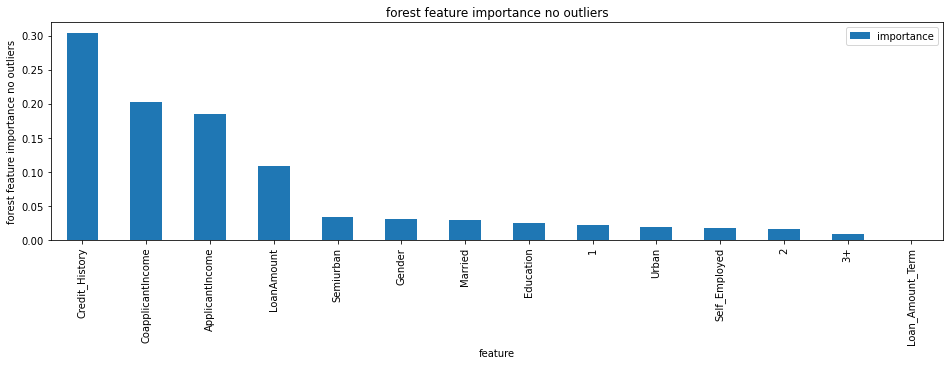

In [24]:
feature_names = list(base_df.columns)
feature_names_1 = list(base_no_outliers_df.columns)

feature_names.remove('Loan_Status')
feature_names_1.remove('Loan_Status')

feature_plot(coef= forest.feature_importances_, columns=feature_names, y_title='forest feature importance')
feature_plot(coef= forest_1.feature_importances_, columns=feature_names_1, y_title='forest feature importance no outliers')

### Generating an ROC Curve for Base Model, GridSearch, and RandomSearch